Ariel Tzooman 211778410

Git link: 

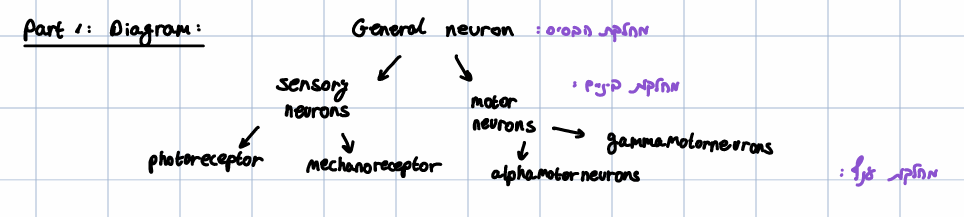

In [ ]:
# part 1: Object Oriented programming 

# task A: is also in the PDF attacheted to the drive.

from IPython.display import Image

# Display the image
Image(filename="hierarchy neurons.png")

In [57]:
# task B: i defined the neuron classes:


class Neuron:  # basic class: all neurons

    def __init__(self, firing_rate):
        self.firing_rate = firing_rate 

    def activate(self, stimulus_strength):
        pass 


class SensoryNeuron(Neuron):  # middle class- type of neuron- sensor

    def __init__(self, firing_rate, receptor_type):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type  

    def sense_stimulus(self, stimulus):
        pass 


class MotorNeuron(Neuron):  # middle class- type of neuron- motor

    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle  

    def control_muscle(self):
        pass 


class Photoreceptor(SensoryNeuron):  # leaf class- type of sensor neuron- photorececptor
    def __init__(self, firing_rate):
        super().__init__(firing_rate, "light")

    def light_detection(self, light_intensity):
        pass 


class Mechanoreceptor(SensoryNeuron):  # leaf class- type of sensor neuron- Mechanoreceptor
    def __init__(self, firing_rate):
        super().__init__(firing_rate, "pressure") 

    def pressure_detection(self, pressure_level):
        pass


class AlphaMotorNeuron(MotorNeuron):  # leaf class- type of motor neuron- AlphaMotorNeuron
    def __init__(self, firing_rate):
        super().__init__(firing_rate, "skeletal muscle") 

    def skeletal_muscle_control(self):
        pass


class GammaMotorNeuron(MotorNeuron):  # leaf class- type of motor neuron- GammaMotorNeuron
    def __init__(self, firing_rate):
        super().__init__(firing_rate, "muscle spindle")

    def muscle_spindle_control(self):
        pass




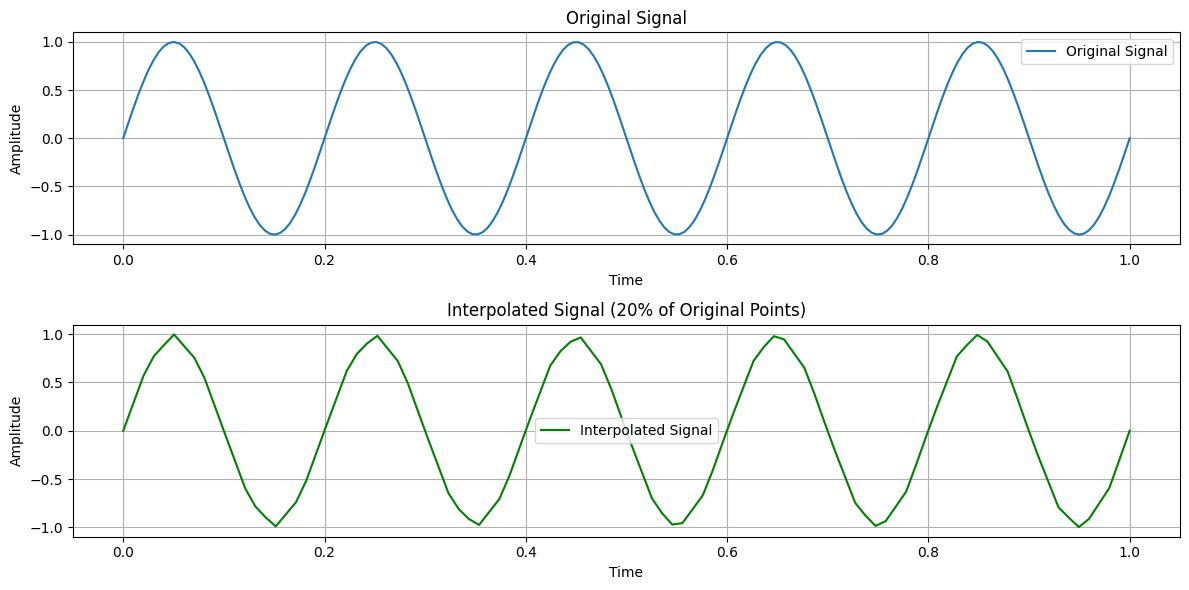

In [ ]:
# part 2- NumPy, Pandas, MatPlotLib:

# Q1- function that samples a sinusoidal signal

!pip install numpy
!pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt

def downsample_signal(signal, sample_rate=5):
   
    # Find maximum and minimum points
    maxima = np.r_[True, signal[1:] > signal[:-1]] & np.r_[signal[:-1] > signal[1:], True]
    minima = np.r_[True, signal[1:] < signal[:-1]] & np.r_[signal[:-1] < signal[1:], True]
    
    # Create a mask to select points
    mask = np.zeros(len(signal), dtype=bool)
    mask[0] = True  # Always keep the first point
    mask[-1] = True  # And the last point
    
    # Add extrema points
    mask[np.where(maxima | minima)[0]] = True
    
    # Select additional points
    mask[::sample_rate] = True
    
    return mask

# Verification script
def visualize_sampling():
    # Create sinusoidal signal
    time = np.linspace(0, 1, 200)  # Time range from 0 to 1
    signal = np.sin(2 * np.pi * 5 * time)  # 5 Hz frequency
    
    # Get sampling mask
    sampling_mask = downsample_signal(signal)
    
    # Create downsampled points
    downsampled_time = time[sampling_mask]
    downsampled_signal = signal[sampling_mask]
    
    # Manual interpolation using linear approximation
    smooth_time = np.linspace(0, 1, 100)
    smooth_signal = np.zeros_like(smooth_time)
    
    for i in range(len(smooth_time)):
        # Find the two closest points in downsampled signal
        idx = np.searchsorted(downsampled_time, smooth_time[i])
        
        # Ensure idx is within bounds
        if idx == 0:
            smooth_signal[i] = downsampled_signal[0]
        elif idx >= len(downsampled_signal):
            smooth_signal[i] = downsampled_signal[-1]
        else:
            # Linear interpolation
            x0, x1 = downsampled_time[idx-1], downsampled_time[idx]
            y0, y1 = downsampled_signal[idx-1], downsampled_signal[idx]
            smooth_signal[i] = y0 + (y1 - y0) * (smooth_time[i] - x0) / (x1 - x0)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Original signal subplot
    plt.subplot(2, 1, 1)
    plt.plot(time, signal, label='Original Signal')
    plt.title('Original Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    
    # Interpolated signal subplot
    plt.subplot(2, 1, 2)
    plt.plot(smooth_time, smooth_signal, color='green', label='Interpolated Signal')
    plt.title('Interpolated Signal (20% of Original Points)')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Run verification
visualize_sampling()

Column Types:
Company                 object
Product                 object
TypeName                object
Inches                 float64
ScreenResolution        object
CPU_Company             object
CPU_Type                object
CPU_Frequency (GHz)    float64
RAM (GB)                 int64
Memory                  object
GPU_Company             object
GPU_Type                object
OpSys                   object
Weight (kg)            float64
Price (Euro)           float64
dtype: object

Unique RAM Values:
[ 8 16  4  2 12  6 32 24 64]


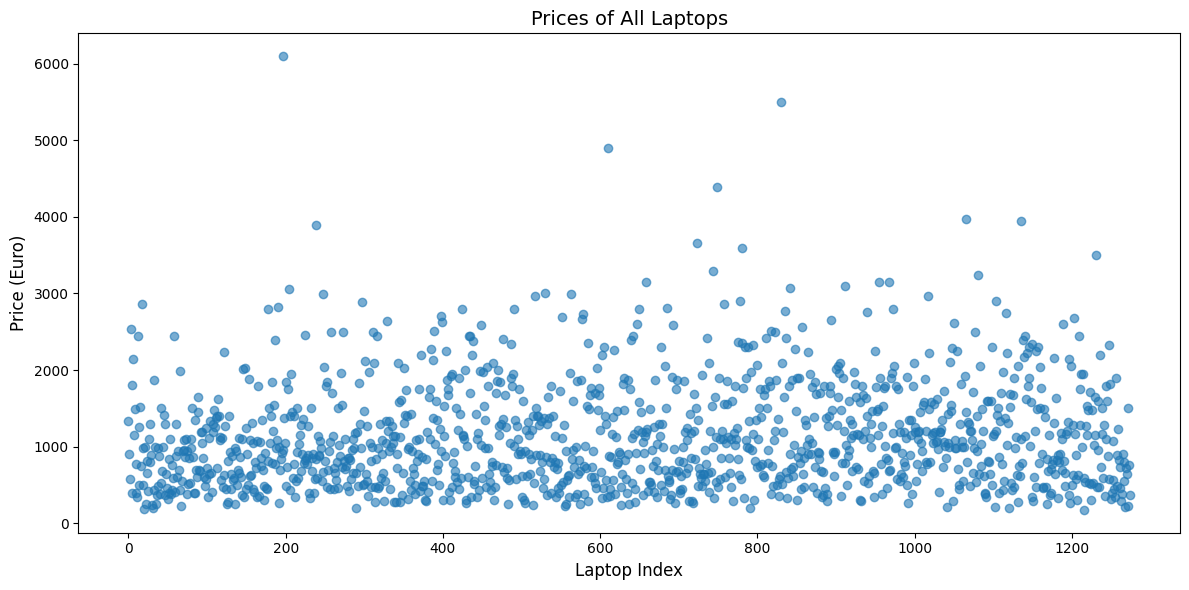


Average Laptop Price by Company:
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64


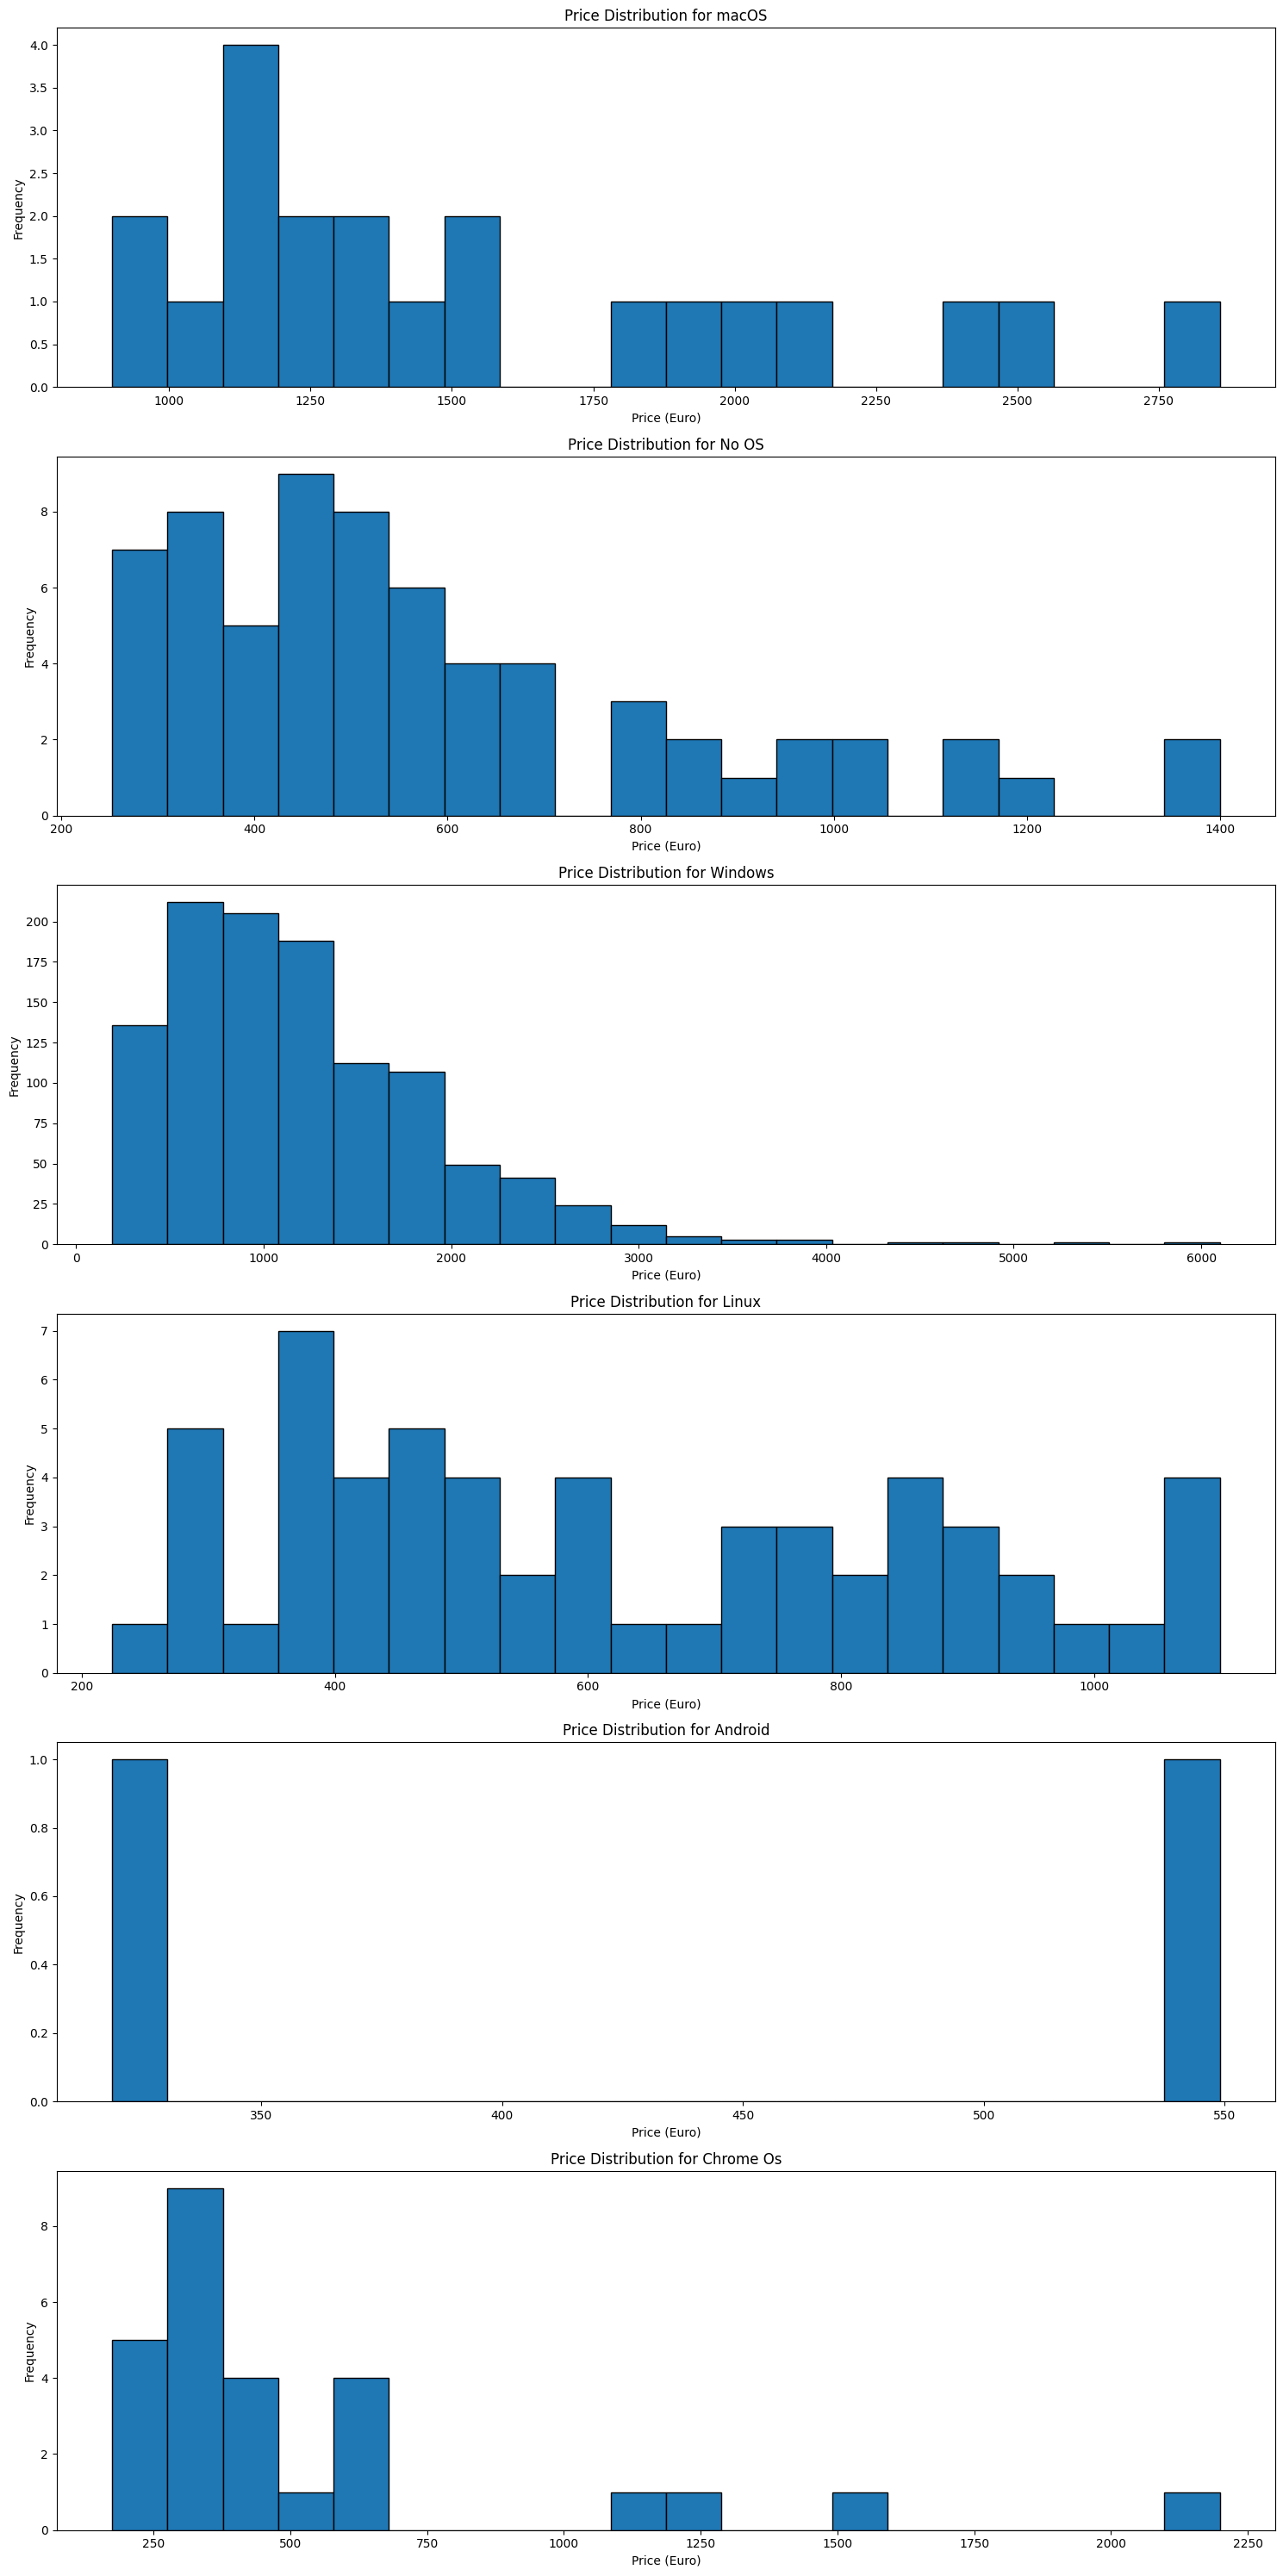

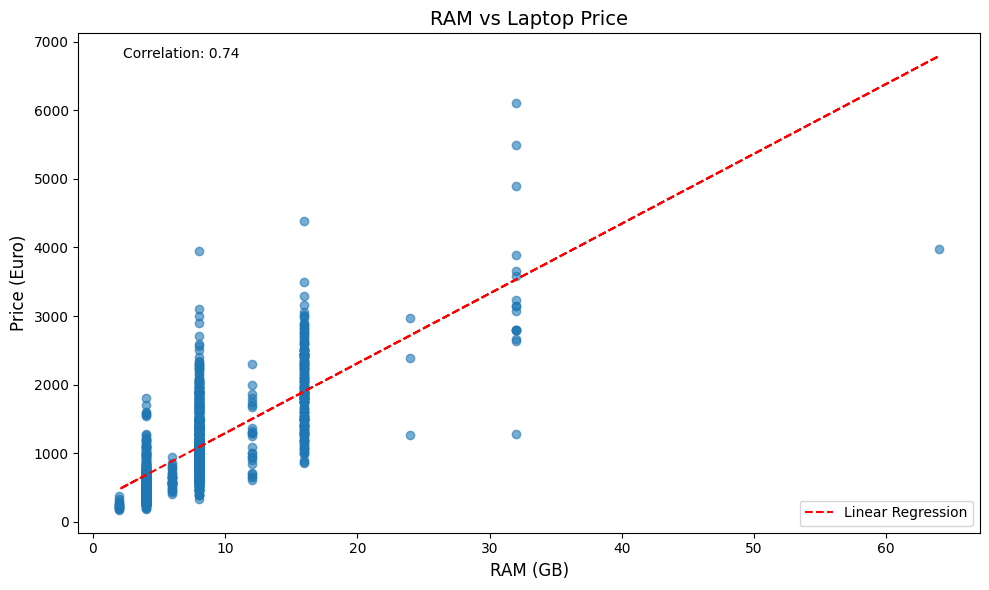


Storage Types:
Storage_Type
SSD        635
HDD        560
Storage     70
Hybrid      10
Name: count, dtype: int64

First few rows with new Storage Type column:
                Memory Storage_Type
0            128GB SSD          SSD
1  128GB Flash Storage      Storage
2            256GB SSD          SSD
3            512GB SSD          SSD
4            256GB SSD          SSD

Unique Original Operating Systems:
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']

Unique Standardized Operating Systems:
['macOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome Os']


In [6]:
# Q2- laptop-prices

!pip install pandas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the dataset
file_path = "laptop_price - dataset.csv"  # Replace with the path to your file
df = pd.read_csv(file_path) 

# Print column information to understand the data types
print("Column Types:")
print(df.dtypes)

# Print unique values in RAM column to understand its format
print("\nUnique RAM Values:")
print(df['RAM (GB)'].unique())

# 1. Plot the price of all laptops
plt.figure(figsize=(12, 6))
plt.scatter(range(len(df)), df['Price (Euro)'], alpha=0.6)
plt.title('Prices of All Laptops', fontsize=14)
plt.xlabel('Laptop Index', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.tight_layout()
plt.show()

# 2. Average laptop price by company
avg_price_by_company = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)
print("\nAverage Laptop Price by Company:")
print(avg_price_by_company)

# 3. Handling Operating System variations
# Standardize Operating Systems
def standardize_os(os):
    os = str(os).lower()
    if 'windows' in os:
        return 'Windows'
    elif 'mac' in os or 'macos' in os or 'os x' in os:
        return 'macOS'
    elif 'linux' in os:
        return 'Linux'
    elif 'no os' in os or 'none' in os:
        return 'No OS'
    else:
        return os.title()

df['Standardized_OS'] = df['OpSys'].apply(standardize_os)

# 4. Price distribution for each OS
unique_os = df['Standardized_OS'].unique()
plt.figure(figsize=(15, 5 * len(unique_os)))
for i, os in enumerate(unique_os, 1):
    plt.subplot(len(unique_os), 1, i)
    os_data = df[df['Standardized_OS'] == os]['Price (Euro)']
    plt.hist(os_data, bins=20, edgecolor='black')
    plt.title(f'Price Distribution for {os}', fontsize=12)
    plt.xlabel('Price (Euro)', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
plt.tight_layout()
plt.show()

# 5. Relationship between RAM and Price
# Create the plot
plt.figure(figsize=(10, 6))

# Extract numeric RAM values and perform scatter plot
plt.scatter(df['RAM (GB)'], df['Price (Euro)'], alpha=0.6)

# Calculate linear regression
x = df['RAM (GB)']
y = df['Price (Euro)']
coefficients = np.polyfit(x, y, 1)
regression_line = np.poly1d(coefficients)

# Plot regression line in red
plt.plot(x, regression_line(x), color='red', linestyle='--', label='Linear Regression')

# Plot details
plt.title('RAM vs Laptop Price', fontsize=14)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)

# Calculate correlation
correlation = df['RAM (GB)'].corr(df['Price (Euro)'])

# Annotate correlation
plt.annotate(f'Correlation: {correlation:.2f}', 
             xy=(0.05, 0.95), 
             xycoords='axes fraction',
             fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()

# 6. Extract Storage Type
def extract_storage_type(memory):
    # Split the memory string and get the last word (storage type)
    parts = str(memory).split()
    return parts[-1] if parts else 'Unknown'

df['Storage_Type'] = df['Memory'].apply(extract_storage_type)

# Print results and additional insights
print("\nStorage Types:")
print(df['Storage_Type'].value_counts())

# Print the first few rows to verify
print("\nFirst few rows with new Storage Type column:")
print(df[['Memory', 'Storage_Type']].head())

# Print unique Operating Systems before and after standardization
print("\nUnique Original Operating Systems:")
print(df['OpSys'].unique())
print("\nUnique Standardized Operating Systems:")
print(df['Standardized_OS'].unique())

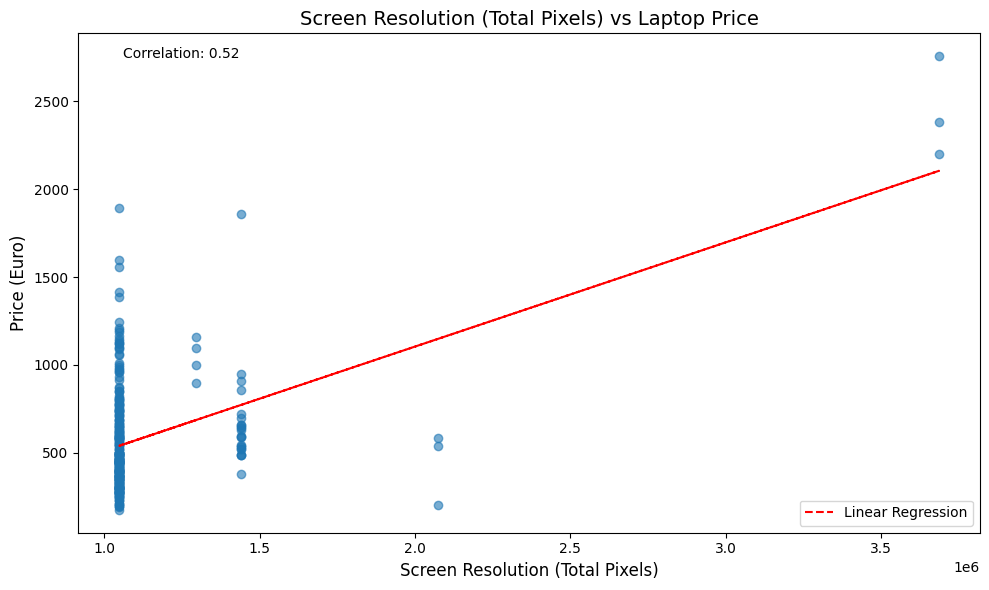


Correlation Analysis of Screen Resolution and Laptop Price:

Correlation Coefficient: 0.52

Interpretation:
- The correlation coefficient of 0.52 indicates a moderate positive relationship between screen resolution and laptop price.

Meaning:
- As the total number of pixels increases, the laptop price tends to increase.
- This suggests that screen resolution is a moderate factor in determining laptop pricing.




In [2]:
# Bonus Question #1

# first question: The correlation between the Screen-Resolution and the price of said device.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the dataset
file_path = "laptop_price - dataset.csv"  # Replace with the path to your file
df = pd.read_csv(file_path) 

# Function to extract total pixels from resolution
def extract_total_pixels(resolution):
    try:
        # Split the resolution string and extract width and height
        width, height = map(int, resolution.split('x'))
        return width * height
    except:
        return np.nan

# Create a new column with total pixel count
df['Total_Pixels'] = df['ScreenResolution'].apply(extract_total_pixels)

# Remove rows with invalid pixel counts
df_cleaned = df.dropna(subset=['Total_Pixels'])

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot of total pixels vs price
plt.scatter(df_cleaned['Total_Pixels'], df_cleaned['Price (Euro)'], alpha=0.6)

# Calculate linear regression
x = df_cleaned['Total_Pixels']
y = df_cleaned['Price (Euro)']
coefficients = np.polyfit(x, y, 1)
regression_line = np.poly1d(coefficients)

# Plot regression line in red
plt.plot(x, regression_line(x), color='red', linestyle='--', label='Linear Regression')

# Plot details
plt.title('Screen Resolution (Total Pixels) vs Laptop Price', fontsize=14)
plt.xlabel('Screen Resolution (Total Pixels)', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)

# Calculate correlation
correlation = df_cleaned['Total_Pixels'].corr(df_cleaned['Price (Euro)'])

# Annotate correlation
plt.annotate(f'Correlation: {correlation:.2f}', 
             xy=(0.05, 0.95), 
             xycoords='axes fraction',
             fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()

# Print detailed correlation interpretation
print(f"""
Correlation Analysis of Screen Resolution and Laptop Price:

Correlation Coefficient: {correlation:.2f}

Interpretation:
- The correlation coefficient of {correlation:.2f} indicates a {'strong' if abs(correlation) > 0.7 else 'moderate' if abs(correlation) > 0.4 else 'weak'} {'positive' if correlation > 0 else 'negative'} relationship between screen resolution and laptop price.

Meaning:
- As the total number of pixels increases, the laptop price tends to {'increase' if correlation > 0 else 'decrease'}.
- This suggests that screen resolution is {'an important' if abs(correlation) > 0.7 else 'a moderate'} factor in determining laptop pricing.

""")

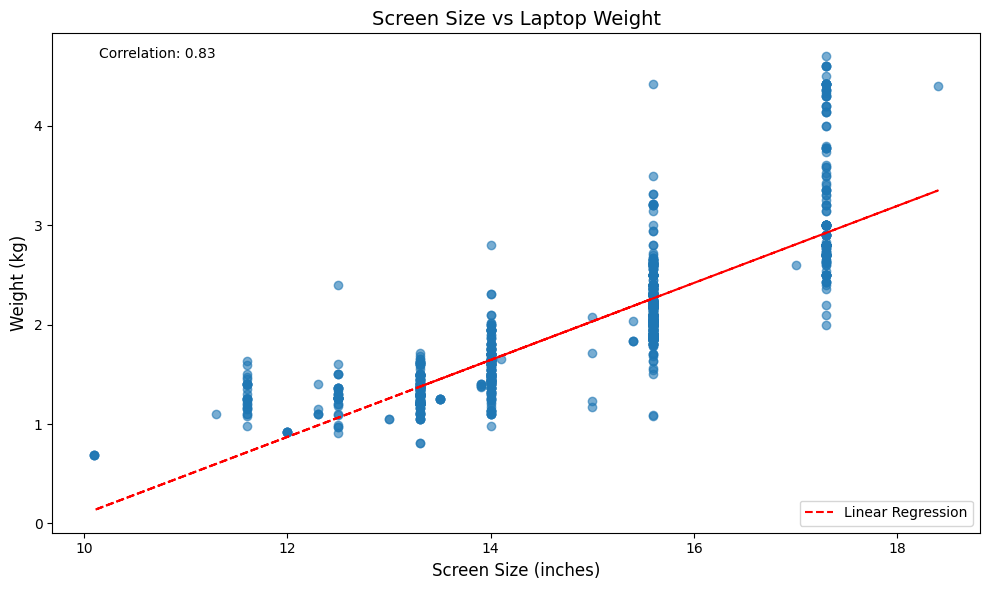


Correlation Analysis of Screen Size and Laptop Weight:

Correlation Coefficient: 0.83

Interpretation:
- The correlation coefficient of 0.83 indicates a strong positive relationship between screen size and laptop weight.

Meaning:
- As the screen size increases, the laptop weight tends to increase.
- This suggests that screen size is an important factor in determining laptop weight.




In [14]:
# Bonus Question #2

# second question: The correlation between the weight and the screen-size of said device.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the dataset
file_path = "laptop_price - dataset.csv"  # Replace with the path to your file
df = pd.read_csv(file_path) 

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot of screen size vs weight
plt.scatter(df['Inches'], df['Weight (kg)'], alpha=0.6)

# Calculate linear regression
x = df['Inches']
y = df['Weight (kg)']
coefficients = np.polyfit(x, y, 1)
regression_line = np.poly1d(coefficients)

# Plot regression line in red
plt.plot(x, regression_line(x), color='red', linestyle='--', label='Linear Regression')

# Plot details
plt.title('Screen Size vs Laptop Weight', fontsize=14)
plt.xlabel('Screen Size (inches)', fontsize=12)
plt.ylabel('Weight (kg)', fontsize=12)

# Calculate correlation
correlation = df['Inches'].corr(df['Weight (kg)'])

# Annotate correlation
plt.annotate(f'Correlation: {correlation:.2f}', 
             xy=(0.05, 0.95), 
             xycoords='axes fraction',
             fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()

# Print detailed correlation interpretation
print(f"""
Correlation Analysis of Screen Size and Laptop Weight:

Correlation Coefficient: {correlation:.2f}

Interpretation:
- The correlation coefficient of {correlation:.2f} indicates a {'strong' if abs(correlation) > 0.7 else 'moderate' if abs(correlation) > 0.4 else 'weak'} {'positive' if correlation > 0 else 'negative'} relationship between screen size and laptop weight.

Meaning:
- As the screen size increases, the laptop weight tends to {'increase' if correlation > 0 else 'decrease'}.
- This suggests that screen size is {'an important' if abs(correlation) > 0.7 else 'a moderate'} factor in determining laptop weight.

""")